<a href="https://colab.research.google.com/github/AndreeaNicoletaBrandiburu/ROSPIN-Satellite-Post-Flood-Recovery/blob/main/satellite_data_processor_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the 'rasterio' library using pip.
# This library is essential for reading and writing satellite data files (like GeoTIFFs).
%pip install rasterio

Satellite Data Processing Module V1
1. Simulating basic data loading...
Simulated data (B4, B8) loaded.
2. Performing simple computations (NDVI)...
NDVI calculation complete.

--- RESULTS ---
Final NDVI map shape: (100, 100)


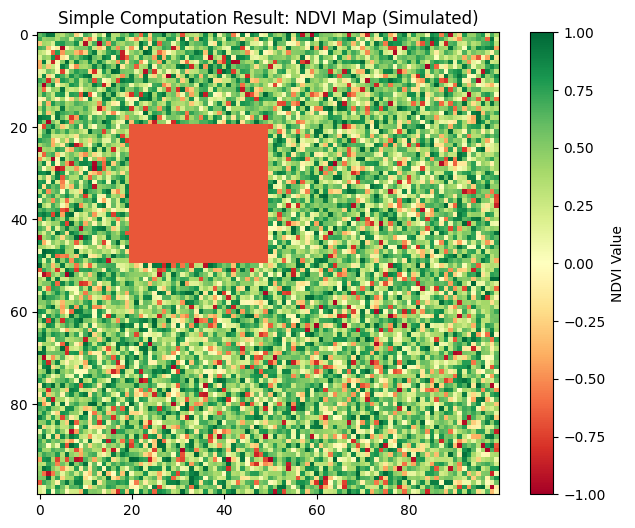

In [3]:
import numpy as np
import rasterio # We import rasterio to show it's part of the intended workflow
import matplotlib.pyplot as plt

print("Satellite Data Processing Module V1")

def basic_data_loading_simulation():
    """
    Simulates the 'basic data loading' of Sentinel-2 bands (Band 4 and Band 8).
    In a real-world application, this function would use rasterio to open actual .tif files:
    # with rasterio.open('B4.tif') as src:
    #     band_4 = src.read(1)
    """
    print("1. Simulating basic data loading...")

    # Simulate Band 4 (Red) - vegetation absorbs red light, so values are lower
    band_4 = np.random.rand(100, 100) * 0.3

    # Simulate Band 8 (NIR - Near Infrared) - healthy vegetation reflects a lot of NIR
    band_8 = np.random.rand(100, 100) * 0.8

    # To make the map more interesting, we simulate a "water body"
    # Water absorbs NIR (low value) and reflects a bit more Red (higher value)
    band_4[20:50, 20:50] = 0.5
    band_8[20:50, 20:50] = 0.1

    print("Simulated data (B4, B8) loaded.")
    return band_4, band_8

def simple_computation_ndvi(band_4, band_8):
    """
    Performs a 'simple computation' (NDVI) on the loaded bands.
    NDVI = Normalized Difference Vegetation Index
    """
    print("2. Performing simple computations (NDVI)...")

    # NDVI Formula: (NIR - Red) / (NIR + Red)
    # We must handle potential division by zero if (B8 + B4) is 0.
    denominator = band_8 + band_4

    # Use np.where to safely divide:
    # where denominator is 0, set ndvi to 0
    # otherwise, calculate (band_8 - band_4) / denominator
    ndvi = np.where(denominator > 0, (band_8 - band_4) / denominator, 0)

    print("NDVI calculation complete.")
    return ndvi

# --- Main Script Execution ---

# 1. Data Loading
# Call the simulation function to get our fake bands
red_band, nir_band = basic_data_loading_simulation()

# 2. Simple Computation
# Call the function to calculate NDVI
ndvi_map = simple_computation_ndvi(red_band, nir_band)

# 3. Display Results
print("\n--- RESULTS ---")
print(f"Final NDVI map shape: {ndvi_map.shape}")

# Use matplotlib to visualize the resulting NDVI map
# 'cmap' (colormap) 'RdYlGn' goes from Red (low NDVI, unhealthy) to Green (high NDVI, healthy)
# 'vmin' and 'vmax' lock the color scale to the standard NDVI range (-1 to +1)
plt.figure(figsize=(8, 6))
plt.title("Simple Computation Result: NDVI Map (Simulated)")
img = plt.imshow(ndvi_map, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(img, label="NDVI Value")
plt.show()